In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
file_path="/content/gdrive/My Drive/Paper Report/"
titanic_data=pd.read_csv(file_path+"titanic_train.csv")


Mounted at /content/gdrive


In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [6]:
# The oldest person on the titanic is 80 and the youngest was 3 months old
# The average age is 29 and a half years old

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(titanic_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [8]:
titanic_data["Cabin"]=titanic_data["Cabin"].fillna("?")

Text(0.5, 1.0, 'Age Distribution of Passengers')

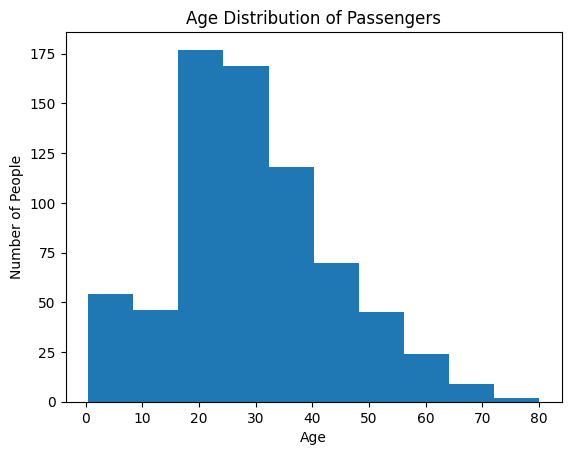

In [7]:
# This graph shows the ranges of age and how mnay people are each age
plt.hist(titanic_data["Age"])
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Age Distribution of Passengers")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of People in Each Pclass')

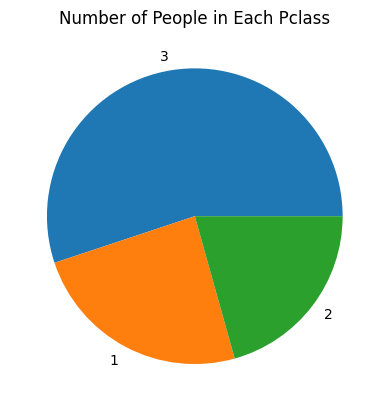

In [9]:
Classes=titanic_data["Pclass"].value_counts()
print(Classes)
plt.pie(Classes, labels=Classes.index)
plt.title("Number of People in Each Pclass")

# This pie chart shows the total amount of people in each class

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7d55b3b133d0>,
 [Text(-0.7128398214280038, 0.8377704870586524, 'S'),
  Text(0.4614522559226597, -0.9985298270476893, 'C'),
  Text(1.0595276168013974, -0.29563698894954155, 'Q')])

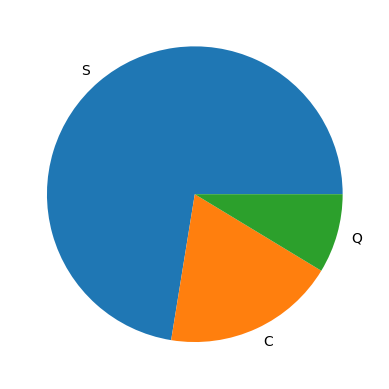

In [11]:
# This pie charts shows the number of passengers embared per category
print(titanic_data["Embarked"].value_counts())
plt.pie(titanic_data["Embarked"].value_counts(), labels=titanic_data["Embarked"].value_counts().index)

In [14]:
survived_by_class = titanic_data[titanic_data['Survived'] == 1].groupby('Pclass').size()
print(survived_by_class)
# This line of code shows the amount of passengers that survived from each class


Pclass
1    136
2     87
3    119
dtype: int64


Text(0.5, 1.0, 'Number of Survivors by Passenger Class')

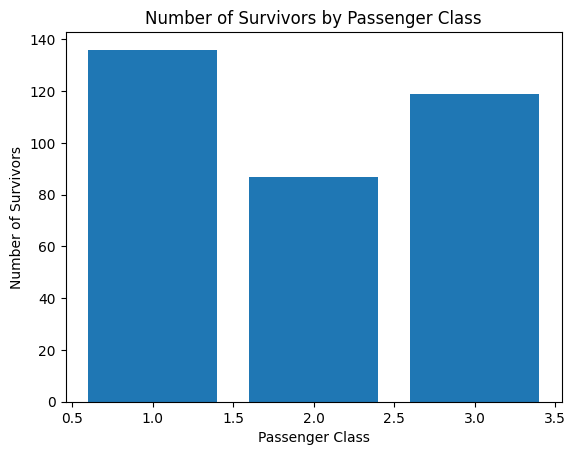

In [15]:
plt.bar(survived_by_class.index, survived_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Passenger Class')
# This is a graph of the info from the line above

In [12]:
Survived_per_class=pd.crosstab(titanic_data["Survived"]
                               ,titanic_data["Pclass"])
print(Survived_per_class)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [17]:
c,p,dof,expected=scipy.stats.chi2_contingency(Survived_per_class)
print("P-Value",p)

P-Value 4.549251711298793e-23


In [58]:
titanic_data=titanic_data.dropna()

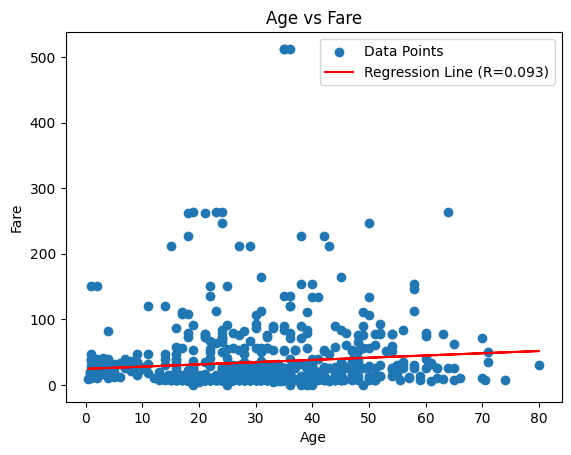

In [90]:
x = titanic_data['Age'].dropna()
y = titanic_data['Fare'].dropna()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

plt.scatter(x, y, label='Data Points')
plt.plot(x, intercept + slope * x, 'r', label=f'Regression Line (R={r_value:.2})') # Added R-value to the label

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.legend()
plt.show()

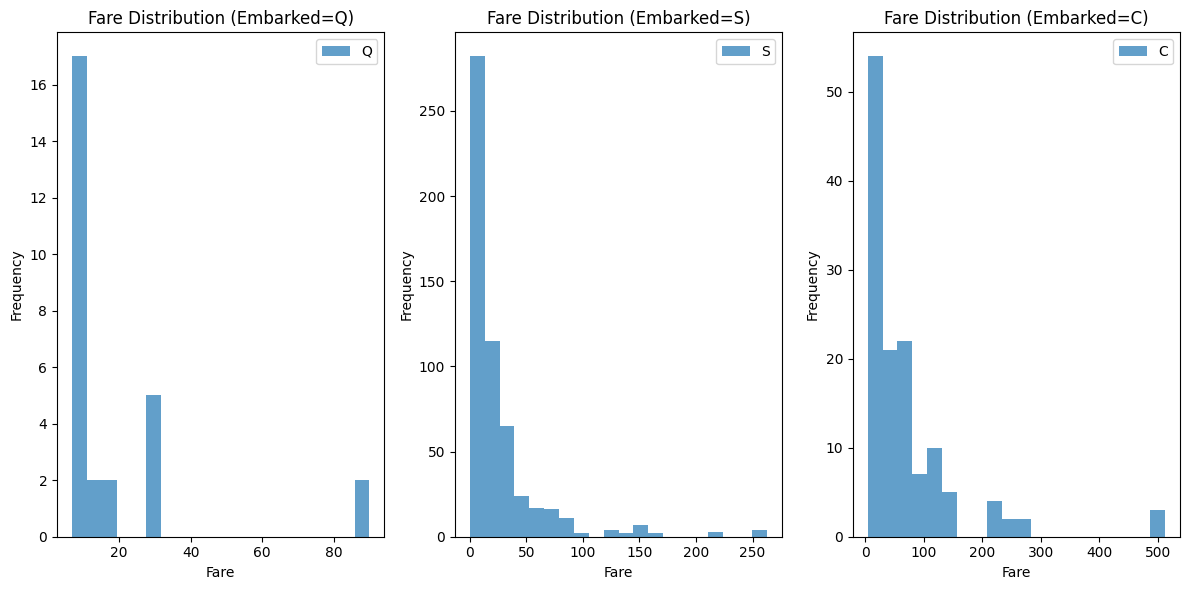

In [94]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(fares_Q, bins=20, alpha=0.7, label='Q')
plt.title('Fare Distribution (Embarked=Q)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(fares_S, bins=20, alpha=0.7, label='S')
plt.title('Fare Distribution (Embarked=S)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(fares_C, bins=20, alpha=0.7, label='C')
plt.title('Fare Distribution (Embarked=C)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
# The people ambarked on Q have the lowest Fare amount

In [19]:
fares_Q = titanic_data.query("Embarked=='Q'")['Fare']
print(fares_Q)
fares_S = titanic_data.query("Embarked=='S'")['Fare']
print(fares_S)
fares_C = titanic_data.query("Embarked=='C'")['Fare']
print(fares_C)

5       8.4583
16     29.1250
22      8.0292
28      7.8792
32      7.7500
        ...   
790     7.7500
825     6.9500
828     7.7500
885    29.1250
890     7.7500
Name: Fare, Length: 77, dtype: float64
0       7.2500
2       7.9250
3      53.1000
4       8.0500
6      51.8625
        ...   
883    10.5000
884     7.0500
886    13.0000
887    30.0000
888    23.4500
Name: Fare, Length: 644, dtype: float64
1      71.2833
9      30.0708
19      7.2250
26      7.2250
30     27.7208
        ...   
866    13.8583
874    24.0000
875     7.2250
879    83.1583
889    30.0000
Name: Fare, Length: 168, dtype: float64


In [20]:
import scipy.stats
from scipy.stats import ks_2samp

# Perform 2-sample Kolmogorov-Smirnov tests
ks_stat_QS, ks_p_QS = ks_2samp(fares_Q, fares_S)
ks_stat_QC, ks_p_QC = ks_2samp(fares_Q, fares_C)
ks_stat_SC, ks_p_SC = ks_2samp(fares_S, fares_C)

print(f"Kolmogorov-Smirnov test (Q vs S): statistic={ks_stat_QS:.3}, \
p-value={ks_p_QS:.3}")
print(f"Kolmogorov-Smirnov test (Q vs C): statistic={ks_stat_QC:.3}, \
p-value={ks_p_QC:.3}")
print(f"Kolmogorov-Smirnov test (S vs C): statistic={ks_stat_SC:.3}, \
p-value={ks_p_SC:.3}")
# The statistics are all simmilar but the p-values for each test are not/
#simmilar meaning they are not related

Kolmogorov-Smirnov test (Q vs S): statistic=0.501, p-value=2.2e-16
Kolmogorov-Smirnov test (Q vs C): statistic=0.502, p-value=1.11e-12
Kolmogorov-Smirnov test (S vs C): statistic=0.29, p-value=2.22e-10
